In this notebook: 

- Figure 2B,C: Riboswitch Kfold-lig ranking

- Fig 3: Riboswitch test set Eterna ranking

- Figure S10: Kfold-lig broken down by ligand type

- Figure S11: Kfold+lig ranking, AR ranking, Kfold-lig with Spearman ranking

In [1]:
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
import os

import eternabench as eb

Populating the interactive namespace from numpy and matplotlib


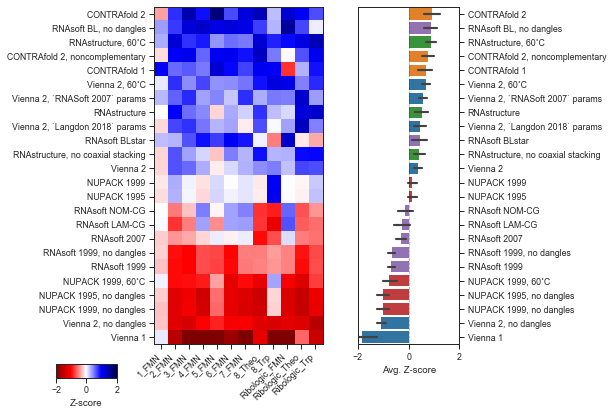

In [2]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/RS_bps_pearson_zscores.csv')
eb.plot.ranked_heatmap(zscores, vmin=-2, vmax=2)

#savefig('FIGURES/2/Figure_1BC.pdf',bbox_inches='tight')

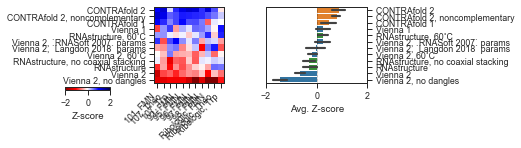

In [6]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/RS_Z_pearson_logkd_lig_zscores.csv')
eb.plot.ranked_heatmap(zscores, vmin=-2, vmax=2)

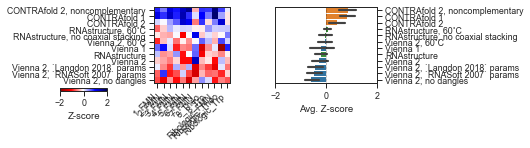

In [7]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/RS_Z_pearson_log_AR_zscores.csv')
eb.plot.ranked_heatmap(zscores, vmin=-2, vmax=2)

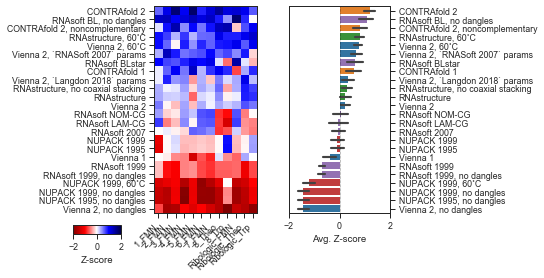

In [9]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/RS_bps_spearman_zscores.csv')
eb.plot.ranked_heatmap(zscores, metric='spearman_zscore_by_Dataset_mean', vmin=-2, vmax=2)



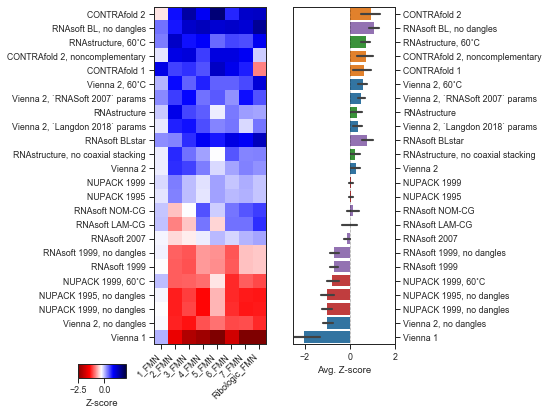

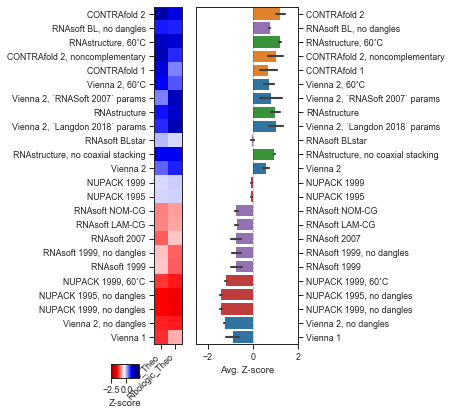

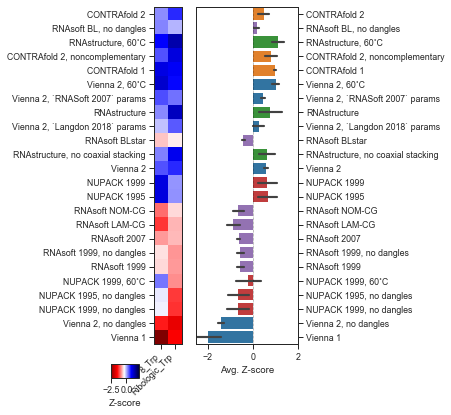

In [9]:
# across different ligand types

eb.plot.ranked_heatmap(zscores.loc[zscores.Dataset.str.endswith('FMN')], vmin=-2.5, vmax=2)
savefig('FIGURES/2/FMN_only.pdf',bbox_inches='tight')

eb.plot.ranked_heatmap(zscores.loc[zscores.Dataset.str.endswith('Theo')], vmin=-2.5, vmax=2)
savefig('FIGURES/2/Theo_only.pdf',bbox_inches='tight')

eb.plot.ranked_heatmap(zscores.loc[zscores.Dataset.str.endswith('Trp')], vmin=-2.5, vmax=2)
savefig('FIGURES/2/Trp_only.pdf',bbox_inches='tight')


In [ ]:
# Figure S8: Scatterplots for all options tested for Ribologic dataset using closing-base-pair estimation

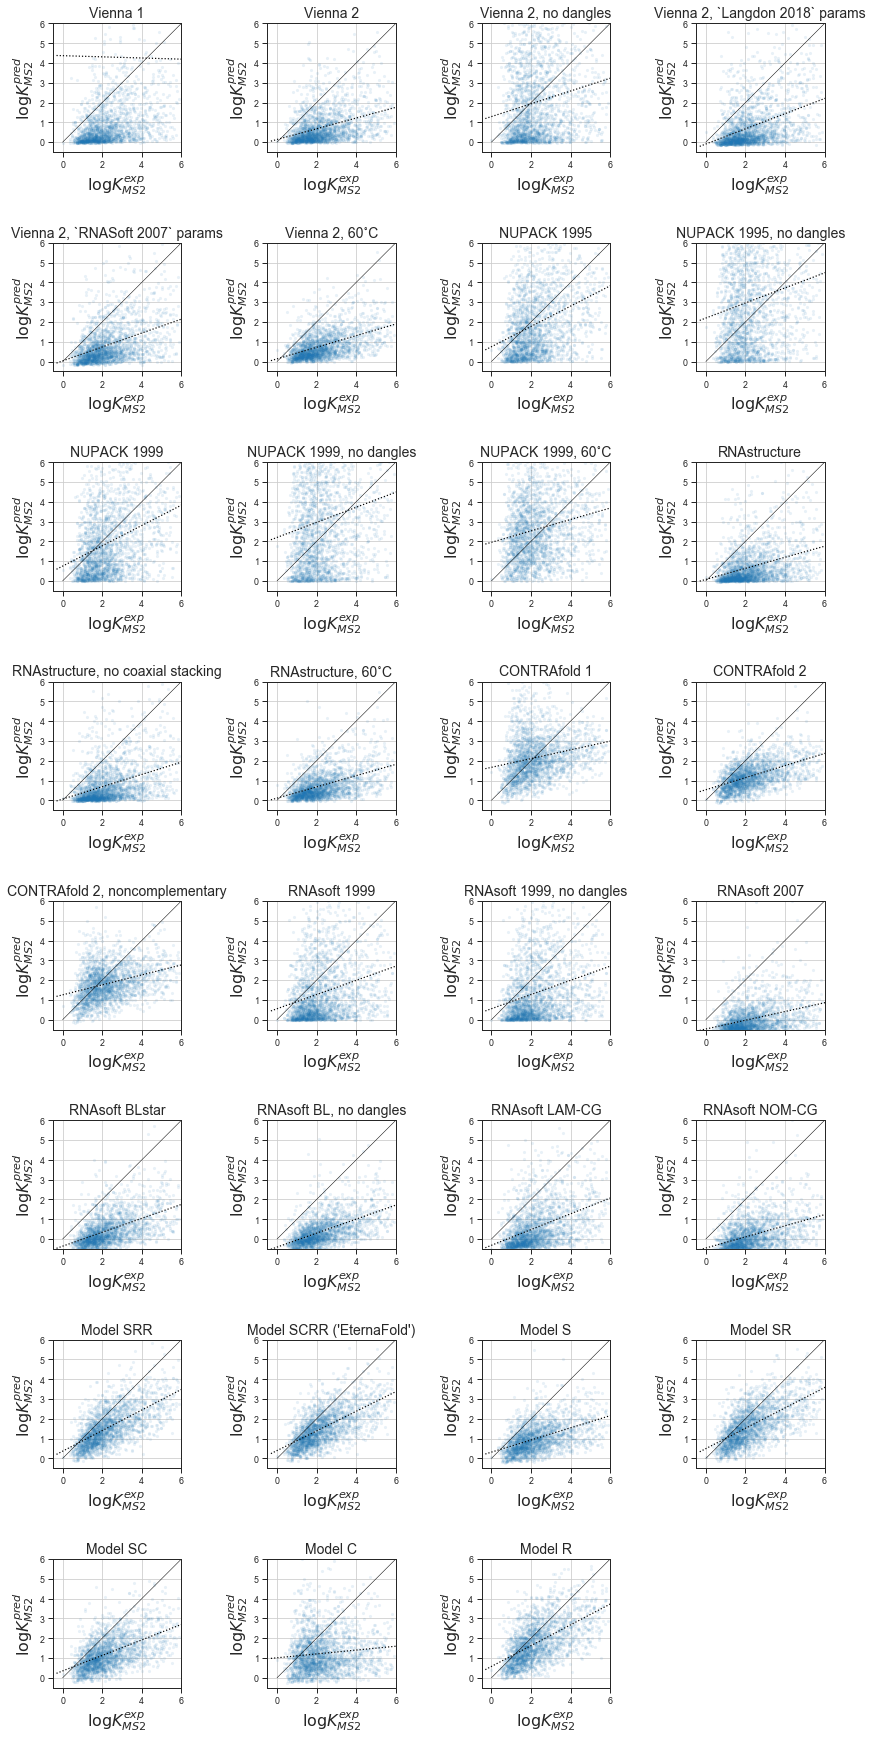

In [39]:
df = pd.read_json('../data/RiboswitchCalculations/RS_by_ds_Ribologic_FMN.json.zip')
packages = eb.plot.get_packages()

ctr=1
figure(figsize=(12,30))

for pkg, pkg_data in packages.iterrows():
    
    if 'log_kfold_est_bp_%s' % pkg in df.keys():

        subplot(10,4,ctr, aspect='equal')
        sns.scatterplot(x='logkd_nolig_scaled',y='log_kfold_est_bp_%s' % pkg, data=df, alpha=0.1, linewidth=0, s=10)
        x=df['logkd_nolig_scaled']
        y=df['log_kfold_est_bp_%s' % pkg]
        eb.plot.corrfunc(x,y, draw_line=True,method='Pearson')

        xlabel(r'$\log K_{MS2}^{exp}$',fontsize=16)
        ylabel(r'$\log K_{MS2}^{pred}$',fontsize=16)
        title(pkg_data['title'],fontsize=14)
        ylim([-0.5,6])
        xlim([-0.5,6])
        grid()
        plot([0,6],[0,6],color='k',linewidth=0.5)
        
        ctr+=1

tight_layout()
savefig('FIGURES/SI/All_packages_Ribologic_FMN.pdf',bbox_inches='tight')
savefig('FIGURES/SI/All_packages_Ribologic_FMN.png',bbox_inches='tight')